In [2]:
import numpy as np
from numpy import NaN
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_excel("/content/AirQualityUCI.xlsx")

#convert Date and Time values:
df['Date'] = df['Date'].dt.month
df['Time'] = pd.to_datetime(df['Time'], format='%X').dt.hour

df = df.replace(-200, NaN) #replace -200 with NaN values

df =  df.drop(['NMHC(GT)'], axis=1) #drop column NMHC(GT) since it has too many missing values
df = df.dropna() #drop rows with missing value
df = df.drop_duplicates() 
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12]] #make RH the last column

In [4]:
arr = df.to_numpy()
X = arr[:, 0:13]
Y = arr[:, 13]

#Test Train Split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1)) #convert row vector to column vector

In [5]:
# Normalising Data:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [ ]:
#1st Model

model1 = tf.keras.Sequential([normalizer])
model1.add(Dense(64, input_dim=13, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss='mean_squared_error')

Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 1524.1364
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 307.1758
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 113.8164
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 57.5872
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 39.1093
Epoch 6/100
174/174 [==============================] - 0s 3ms/step - loss: 29.9082
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 24.5037
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 20.9712
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 18.3419
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 16.0559
Epoch 11/100
174/174 [==============================] - 0s 2ms/step - loss: 13.6429
Epoch 12/100
174/174 [==============================] - 0s 3ms/step - loss: 11.31

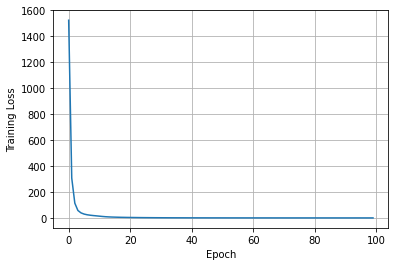

In [28]:
#Training the model:
history1 = model1.fit(X_train, Y_train, epochs=100)

plt.plot(history1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()


In [29]:
#Test Loss:
Y_pred1 = model1.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.2017


In [ ]:
#2nd Model

model2 = tf.keras.Sequential([normalizer])
model2.add(Dense(256, input_dim=13, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Epoch 1/100
174/174 [==============================] - 1s 3ms/step - loss: 786.0068
Epoch 2/100
174/174 [==============================] - 0s 3ms/step - loss: 61.8470
Epoch 3/100
174/174 [==============================] - 0s 3ms/step - loss: 30.7519
Epoch 4/100
174/174 [==============================] - 0s 3ms/step - loss: 22.0712
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 17.1263
Epoch 6/100
174/174 [==============================] - 0s 3ms/step - loss: 12.5366
Epoch 7/100
174/174 [==============================] - 0s 3ms/step - loss: 8.5681
Epoch 8/100
174/174 [==============================] - 0s 3ms/step - loss: 6.4395
Epoch 9/100
174/174 [==============================] - 0s 3ms/step - loss: 5.1500
Epoch 10/100
174/174 [==============================] - 0s 3ms/step - loss: 4.0674
Epoch 11/100
174/174 [==============================] - 0s 3ms/step - loss: 3.3756
Epoch 12/100
174/174 [==============================] - 0s 3ms/step - loss: 2.8983
Epoch 

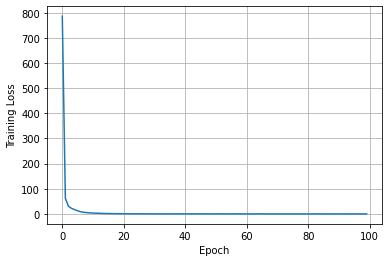

In [31]:
#Training the model:
history2 = model2.fit(X_train, Y_train, epochs=100)

plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [32]:
#Test Loss:
Y_pred2 = model2.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.1494


In [ ]:
#3rd Model

model3 = tf.keras.Sequential([normalizer])
model3.add(Dense(512, input_dim=13, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='relu'))
model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Epoch 1/100
174/174 [==============================] - 1s 3ms/step - loss: 1829.1940
Epoch 2/100
174/174 [==============================] - 0s 3ms/step - loss: 520.0184
Epoch 3/100
174/174 [==============================] - 0s 3ms/step - loss: 288.1314
Epoch 4/100
174/174 [==============================] - 0s 3ms/step - loss: 163.0731
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 99.8918
Epoch 6/100
174/174 [==============================] - 0s 3ms/step - loss: 69.2670
Epoch 7/100
174/174 [==============================] - 0s 3ms/step - loss: 52.3774
Epoch 8/100
174/174 [==============================] - 0s 3ms/step - loss: 41.4654
Epoch 9/100
174/174 [==============================] - 0s 3ms/step - loss: 33.4038
Epoch 10/100
174/174 [==============================] - 0s 3ms/step - loss: 27.3624
Epoch 11/100
174/174 [==============================] - 0s 3ms/step - loss: 22.6503
Epoch 12/100
174/174 [==============================] - 1s 3ms/step - loss: 18.9

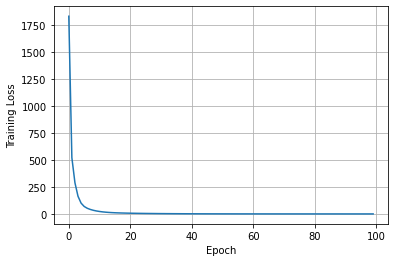

In [34]:
#Training the model:
history3 = model3.fit(X_train, Y_train, epochs=100)

plt.plot(history3.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [35]:
#Test Loss:
Y_pred3 = model3.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.1907


In [ ]:
#4th Model

model4 = tf.keras.Sequential([normalizer])
model4.add(Dense(256, input_dim=13, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='relu'))
model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Epoch 1/100
174/174 [==============================] - 1s 3ms/step - loss: 1208.7646
Epoch 2/100
174/174 [==============================] - 1s 3ms/step - loss: 134.0652
Epoch 3/100
174/174 [==============================] - 1s 3ms/step - loss: 40.7495
Epoch 4/100
174/174 [==============================] - 1s 3ms/step - loss: 22.5577
Epoch 5/100
174/174 [==============================] - 1s 3ms/step - loss: 15.8039
Epoch 6/100
174/174 [==============================] - 1s 3ms/step - loss: 12.2312
Epoch 7/100
174/174 [==============================] - 1s 3ms/step - loss: 9.8397
Epoch 8/100
174/174 [==============================] - 1s 3ms/step - loss: 7.8984
Epoch 9/100
174/174 [==============================] - 1s 3ms/step - loss: 6.4594
Epoch 10/100
174/174 [==============================] - 1s 3ms/step - loss: 5.2020
Epoch 11/100
174/174 [==============================] - 1s 3ms/step - loss: 4.3678
Epoch 12/100
174/174 [==============================] - 1s 3ms/step - loss: 3.8719
Epoc

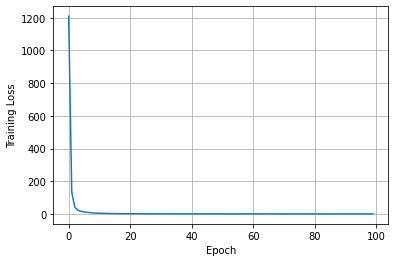

In [13]:
#Training the model:
history4 = model4.fit(X_train, Y_train, epochs=100)

plt.plot(history4.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [14]:
#Test Loss:
Y_pred4 = model4.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.3045


In [ ]:
#5th Model

model5 = tf.keras.Sequential([normalizer])
model5.add(Dense(512, input_dim=13, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1, activation='relu'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Epoch 1/100
174/174 [==============================] - 1s 3ms/step - loss: 1458.5496
Epoch 2/100
174/174 [==============================] - 1s 3ms/step - loss: 244.6940
Epoch 3/100
174/174 [==============================] - 0s 3ms/step - loss: 93.1173
Epoch 4/100
174/174 [==============================] - 1s 3ms/step - loss: 46.7130
Epoch 5/100
174/174 [==============================] - 0s 3ms/step - loss: 27.9812
Epoch 6/100
174/174 [==============================] - 1s 3ms/step - loss: 18.9915
Epoch 7/100
174/174 [==============================] - 1s 3ms/step - loss: 14.8418
Epoch 8/100
174/174 [==============================] - 0s 3ms/step - loss: 12.0305
Epoch 9/100
174/174 [==============================] - 0s 3ms/step - loss: 10.1285
Epoch 10/100
174/174 [==============================] - 0s 3ms/step - loss: 8.5678
Epoch 11/100
174/174 [==============================] - 0s 3ms/step - loss: 7.5097
Epoch 12/100
174/174 [==============================] - 0s 3ms/step - loss: 6.4407
E

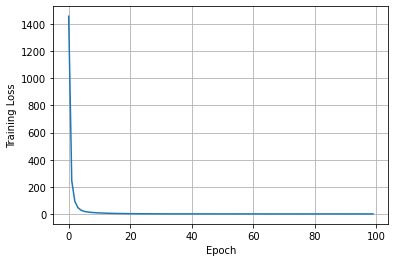

In [21]:
history5 = model5.fit(X_train, Y_train, epochs=100)

plt.plot(history5.history['loss'])
# plt.ylim([0,10])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [26]:
#Test Loss:
Y_pred5 = model5.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.2614
